In [9]:
# import os
# import glob
# import random
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import seaborn as sns
# import matplotlib.pyplot as plt

# # --- Configurable Concept Pools ---
# ECONOMIC_CONCEPT_POOLS = {
#     "layman_friendly": [
#         "oil_price", "housing_starts", "inflation_rate", "consumer_sentiment", "VIX_index",
#         "gas_prices", "rent_prices", "retail_sales", "stock_index_level", "job_postings"
#     ],
#     "professional_signal": [
#         "credit_spread", "yield_curve_slope", "foreign_exchange_rate", "market_liquidity",
#         "corporate_earnings_forecast", "PMI", "volatility_risk_premium", "debt_issuance",
#         "margin_debt", "ETF_flows"
#     ],
#     "academic_theory": [
#         "output_gap", "term_premium", "monetary_velocity", "natural_rate_of_unemployment",
#         "total_factor_productivity", "sticky_prices_index", "savings_rate_theory",
#         "debt_to_gdp_ratio", "Phillips_curve_distance"
#     ],
#     "engineered_or_model_outputs": [
#         "nowcast_gdp", "recession_model_score", "economic_surprise_index",
#         "real_interest_rate_gap", "model_derived_expectations", "latent_growth_factor"
#     ],
#     "linchpins": [
#         "FED_FUNDS_RATE", "GDP", "UNEMPLOYMENT_RATE", "INFLATION_EXPECTATIONS",
#         "NONFARM_PAYROLLS", "CPI_CORE", "ISM_MANUFACTURING", "ECB_RATE"
#     ]
# }

# # Flatten & shuffle all concepts
# all_concepts = sum(ECONOMIC_CONCEPT_POOLS.values(), [])
# random.shuffle(all_concepts)

# # Set your dataset folder
# DATA_FOLDER = "market_shock_synthetic_datasets"
# csv_paths = sorted(glob.glob(os.path.join(DATA_FOLDER, "marketshock_*.csv")))

# for csv_path in csv_paths:
#     df = pd.read_csv(csv_path)
#     dataset_name = os.path.basename(csv_path)

#     print(f"\nProcessing: {dataset_name} — Shape: {df.shape}")

#     raw_features = [col for col in df.columns if col != "rare_event"]
#     X = df[raw_features]
#     y = df["rare_event"]

#     if len(raw_features) > len(all_concepts):
#         raise ValueError("Not enough concept labels for features. Expand the pool.")

#     feature_map = dict(zip(raw_features, all_concepts[:len(raw_features)]))
#     X_named = X.rename(columns=feature_map)

#     # Standardize & PCA
#     X_scaled = StandardScaler().fit_transform(X_named)
#     pca = PCA(n_components=2)
#     components = pca.fit_transform(X_scaled)

#     # Scatterplot
#     pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
#     pca_df["rare_event"] = y
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="rare_event", palette="coolwarm", alpha=0.6)
#     plt.title(f"PCA of Named Economic Features — {dataset_name}")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     # Correlation back to raw features
#     proj_df = pd.DataFrame(X_scaled, columns=X_named.columns)
#     proj_df["PC1"] = components[:, 0]
#     proj_df["PC2"] = components[:, 1]
#     correlations = proj_df.corr().loc[X_named.columns, ["PC1", "PC2"]]

#     for pc in ["PC1", "PC2"]:
#         top = correlations[pc].abs().sort_values(ascending=False).head(5)
#         print(f"\nTop contributors to {pc} — {dataset_name}:")
#         print(top)

#     # Heatmap
#     plt.figure(figsize=(12, 6))
#     sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)
#     plt.title(f"Feature Correlation with Principal Components — {dataset_name}")
#     plt.tight_layout()
#     plt.show()

#     # Print label mapping
#     print("\nFeature Label Mapping (Unblinding Simulation):")
#     for k, v in feature_map.items():
#         print(f"{k} -> {v}")

In [13]:
# import os
# import glob
# import random
# import pandas as pd
# from collections import Counter
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import seaborn as sns
# import matplotlib.pyplot as plt

# # --- Configurable Concept Pools ---
# ECONOMIC_CONCEPT_POOLS = {
#     "layman_friendly": [
#         "oil_price", "housing_starts", "inflation_rate", "consumer_sentiment", "VIX_index",
#         "gas_prices", "rent_prices", "retail_sales", "stock_index_level", "job_postings"
#     ],
#     "professional_signal": [
#         "credit_spread", "yield_curve_slope", "foreign_exchange_rate", "market_liquidity",
#         "corporate_earnings_forecast", "PMI", "volatility_risk_premium", "debt_issuance",
#         "margin_debt", "ETF_flows"
#     ],
#     "academic_theory": [
#         "output_gap", "term_premium", "monetary_velocity", "natural_rate_of_unemployment",
#         "total_factor_productivity", "sticky_prices_index", "savings_rate_theory",
#         "debt_to_gdp_ratio", "Phillips_curve_distance"
#     ],
#     "engineered_or_model_outputs": [
#         "nowcast_gdp", "recession_model_score", "economic_surprise_index",
#         "real_interest_rate_gap", "model_derived_expectations", "latent_growth_factor"
#     ],
#     "linchpins": [
#         "FED_FUNDS_RATE", "GDP", "UNEMPLOYMENT_RATE", "INFLATION_EXPECTATIONS",
#         "NONFARM_PAYROLLS", "CPI_CORE", "ISM_MANUFACTURING", "ECB_RATE"
#     ]
# }

# # Flatten & shuffle all concepts
# all_concepts = sum(ECONOMIC_CONCEPT_POOLS.values(), [])
# random.shuffle(all_concepts)

# # Set your dataset folder
# DATA_FOLDER = "market_shock_synthetic_datasets"
# csv_paths = sorted(glob.glob(os.path.join(DATA_FOLDER, "marketshock_*.csv")))

# # Track global feature contributors
# global_top_features = Counter()

# for csv_path in csv_paths:
#     df = pd.read_csv(csv_path)
#     dataset_name = os.path.basename(csv_path)

#     print(f"\nProcessing: {dataset_name} — Shape: {df.shape}")

#     raw_features = [col for col in df.columns if col != "rare_event"]
#     X = df[raw_features]
#     y = df["rare_event"]

#     if len(raw_features) > len(all_concepts):
#         raise ValueError("Not enough concept labels for features. Expand the pool.")

#     feature_map = dict(zip(raw_features, all_concepts[:len(raw_features)]))
#     X_named = X.rename(columns=feature_map)

#     # Standardize & PCA
#     X_scaled = StandardScaler().fit_transform(X_named)
#     pca = PCA(n_components=2)
#     components = pca.fit_transform(X_scaled)

#     # Scatterplot
#     pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
#     pca_df["rare_event"] = y
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="rare_event", palette="coolwarm", alpha=0.6)
#     plt.title(f"PCA of Named Economic Features — {dataset_name}")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     # Correlation back to raw features
#     proj_df = pd.DataFrame(X_scaled, columns=X_named.columns)
#     proj_df["PC1"] = components[:, 0]
#     proj_df["PC2"] = components[:, 1]
#     correlations = proj_df.corr().loc[X_named.columns, ["PC1", "PC2"]]

#     for pc in ["PC1", "PC2"]:
#         top = correlations[pc].abs().sort_values(ascending=False).head(5)
#         global_top_features.update(top.index)
#         print(f"\nTop contributors to {pc} — {dataset_name}:")
#         print(top)

#     # Heatmap
#     plt.figure(figsize=(12, 6))
#     sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)
#     plt.title(f"Feature Correlation with Principal Components — {dataset_name}")
#     plt.tight_layout()
#     plt.show()

#     # Print label mapping
#     print("\nFeature Label Mapping (Unblinding Simulation):")
#     for k, v in feature_map.items():
#         print(f"{k} -> {v}")

# # Aggregate analysis
# print("\n\n=== Global Most Frequent Contributors Across Datasets ===")
# global_df = pd.Series(global_top_features).sort_values(ascending=False).head(15)
# print(global_df)

# # Plot
# plt.figure(figsize=(10, 6))
# global_df.plot(kind="barh", title="Most Common Top PCA Contributors Across Datasets")
# plt.xlabel("Frequency")
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()



Processing: marketshock_extreme_s2.csv — Shape: (5000, 16)


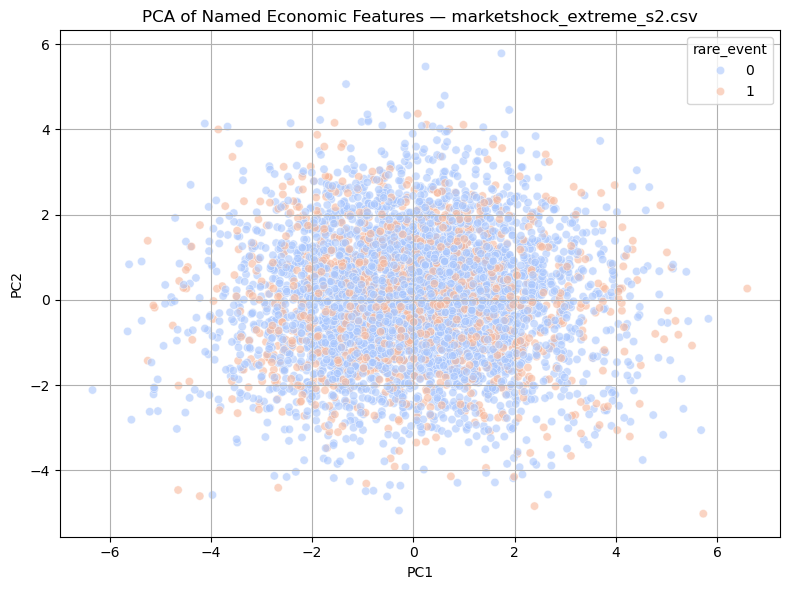


Top contributors to PC1 — marketshock_extreme_s2.csv:
oil_price                 0.750666
retail_sales              0.740072
real_interest_rate_gap    0.704690
margin_debt               0.667522
ISM_MANUFACTURING         0.614874
Name: PC1, dtype: float64

Top contributors to PC2 — marketshock_extreme_s2.csv:
NONFARM_PAYROLLS    0.787478
output_gap          0.655974
retail_sales        0.572598
housing_starts      0.542206
inflation_rate      0.502938
Name: PC2, dtype: float64


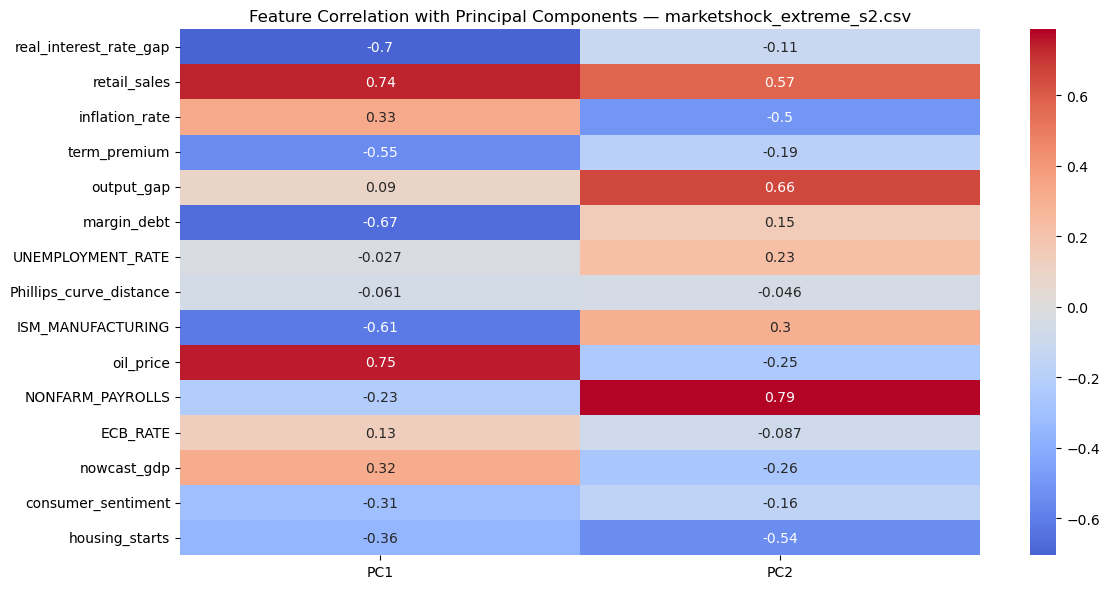


Feature Label Mapping (Unblinding Simulation):
feature_0 -> real_interest_rate_gap
feature_1 -> retail_sales
feature_2 -> inflation_rate
feature_3 -> term_premium
feature_4 -> output_gap
feature_5 -> margin_debt
feature_6 -> UNEMPLOYMENT_RATE
feature_7 -> Phillips_curve_distance
feature_8 -> ISM_MANUFACTURING
feature_9 -> oil_price
feature_10 -> NONFARM_PAYROLLS
feature_11 -> ECB_RATE
feature_12 -> nowcast_gdp
feature_13 -> consumer_sentiment
feature_14 -> housing_starts

Processing: marketshock_extreme_s3.csv — Shape: (5000, 16)


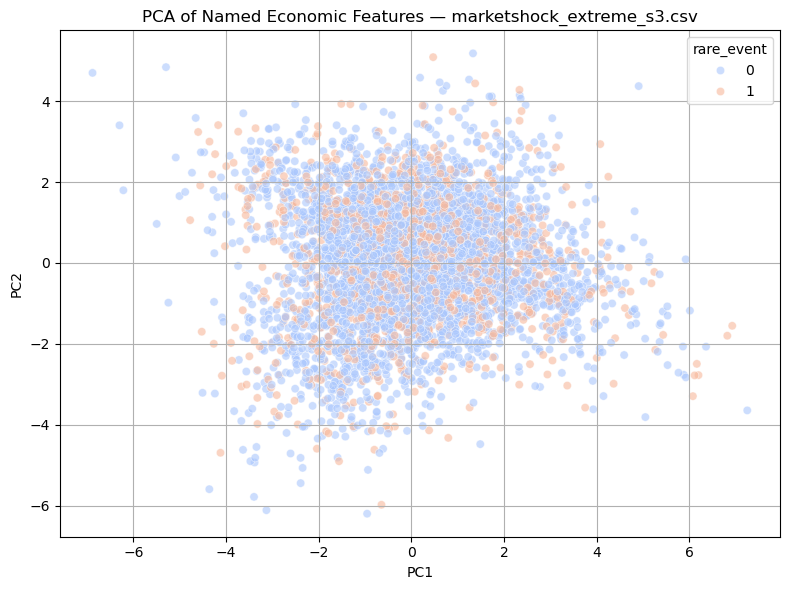


Top contributors to PC1 — marketshock_extreme_s3.csv:
real_interest_rate_gap    0.774849
margin_debt               0.721700
ECB_RATE                  0.661220
retail_sales              0.633972
ISM_MANUFACTURING         0.545088
Name: PC1, dtype: float64

Top contributors to PC2 — marketshock_extreme_s3.csv:
Phillips_curve_distance    0.750122
output_gap                 0.734895
term_premium               0.539653
NONFARM_PAYROLLS           0.533120
housing_starts             0.479283
Name: PC2, dtype: float64


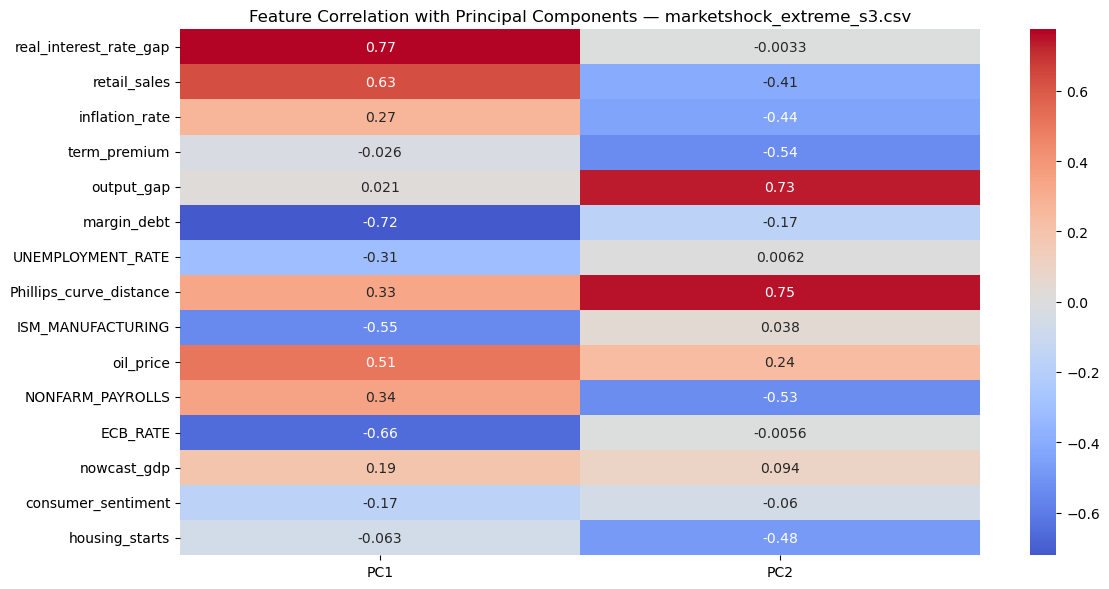


Feature Label Mapping (Unblinding Simulation):
feature_0 -> real_interest_rate_gap
feature_1 -> retail_sales
feature_2 -> inflation_rate
feature_3 -> term_premium
feature_4 -> output_gap
feature_5 -> margin_debt
feature_6 -> UNEMPLOYMENT_RATE
feature_7 -> Phillips_curve_distance
feature_8 -> ISM_MANUFACTURING
feature_9 -> oil_price
feature_10 -> NONFARM_PAYROLLS
feature_11 -> ECB_RATE
feature_12 -> nowcast_gdp
feature_13 -> consumer_sentiment
feature_14 -> housing_starts

Processing: marketshock_hard_s1.csv — Shape: (5000, 16)


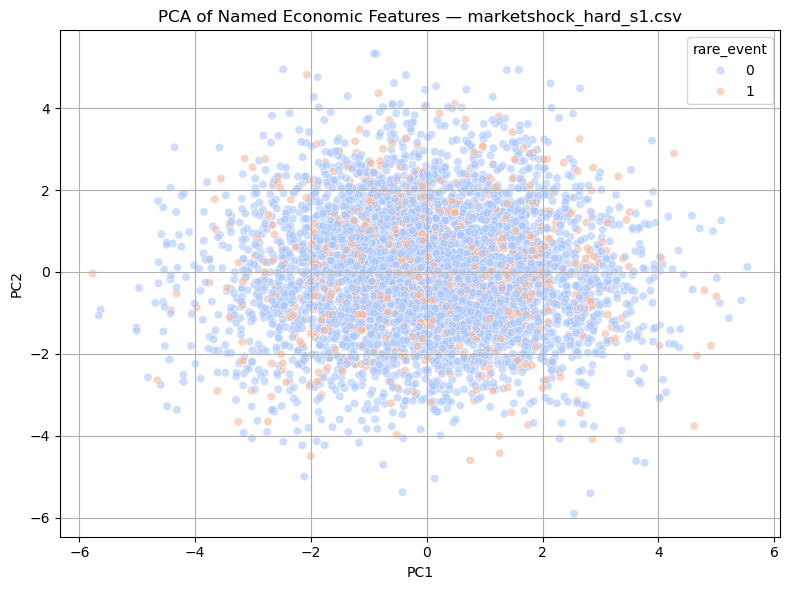


Top contributors to PC1 — marketshock_hard_s1.csv:
term_premium               0.805103
Phillips_curve_distance    0.703755
real_interest_rate_gap     0.701879
margin_debt                0.676465
ISM_MANUFACTURING          0.518603
Name: PC1, dtype: float64

Top contributors to PC2 — marketshock_hard_s1.csv:
ISM_MANUFACTURING         0.593002
oil_price                 0.561141
real_interest_rate_gap    0.560701
ECB_RATE                  0.514451
inflation_rate            0.505228
Name: PC2, dtype: float64


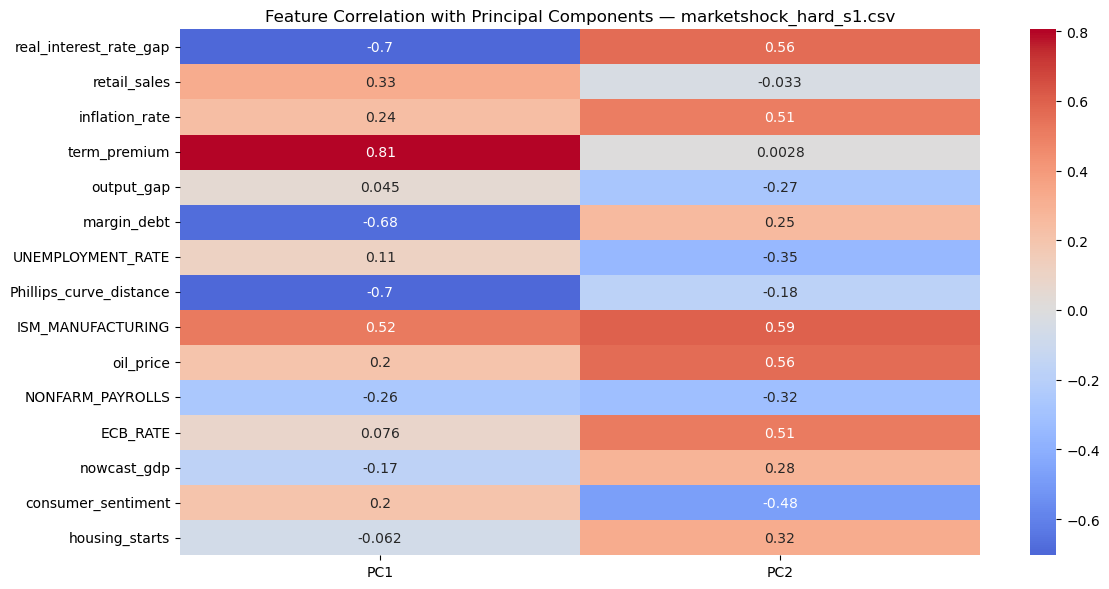


Feature Label Mapping (Unblinding Simulation):
feature_0 -> real_interest_rate_gap
feature_1 -> retail_sales
feature_2 -> inflation_rate
feature_3 -> term_premium
feature_4 -> output_gap
feature_5 -> margin_debt
feature_6 -> UNEMPLOYMENT_RATE
feature_7 -> Phillips_curve_distance
feature_8 -> ISM_MANUFACTURING
feature_9 -> oil_price
feature_10 -> NONFARM_PAYROLLS
feature_11 -> ECB_RATE
feature_12 -> nowcast_gdp
feature_13 -> consumer_sentiment
feature_14 -> housing_starts

Processing: marketshock_hard_s2.csv — Shape: (5000, 16)


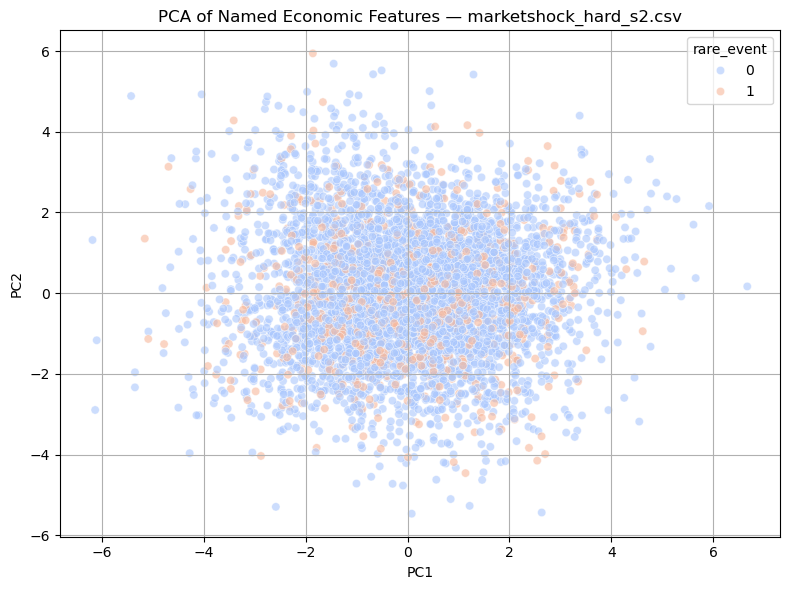


Top contributors to PC1 — marketshock_hard_s2.csv:
real_interest_rate_gap    0.843066
margin_debt               0.674847
output_gap                0.617023
consumer_sentiment        0.606220
housing_starts            0.522399
Name: PC1, dtype: float64

Top contributors to PC2 — marketshock_hard_s2.csv:
oil_price                  0.853010
Phillips_curve_distance    0.611700
term_premium               0.590343
ECB_RATE                   0.528409
NONFARM_PAYROLLS           0.395765
Name: PC2, dtype: float64


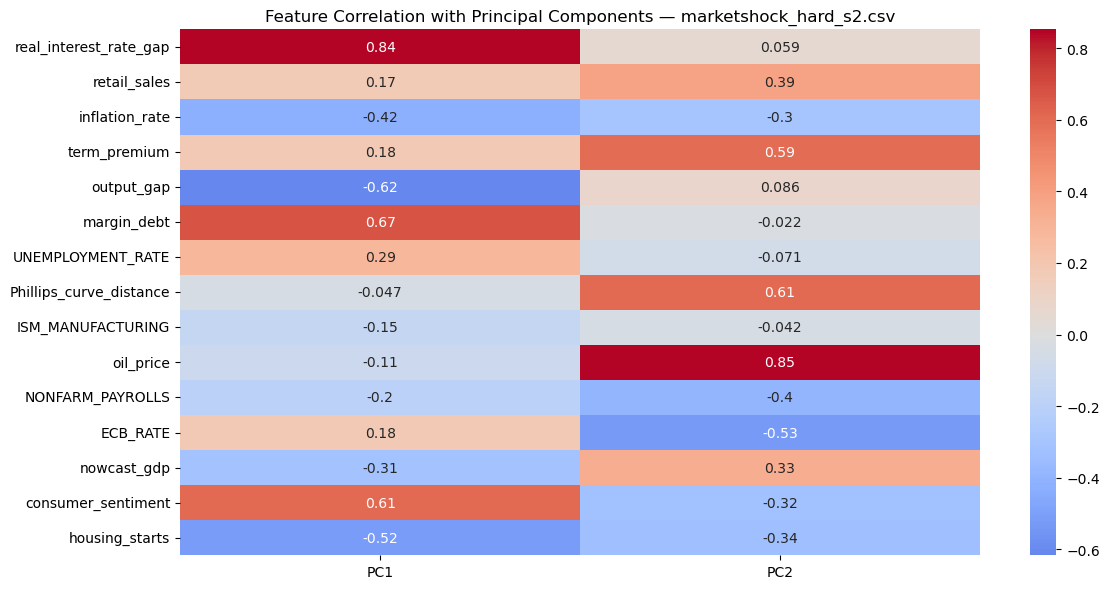


Feature Label Mapping (Unblinding Simulation):
feature_0 -> real_interest_rate_gap
feature_1 -> retail_sales
feature_2 -> inflation_rate
feature_3 -> term_premium
feature_4 -> output_gap
feature_5 -> margin_debt
feature_6 -> UNEMPLOYMENT_RATE
feature_7 -> Phillips_curve_distance
feature_8 -> ISM_MANUFACTURING
feature_9 -> oil_price
feature_10 -> NONFARM_PAYROLLS
feature_11 -> ECB_RATE
feature_12 -> nowcast_gdp
feature_13 -> consumer_sentiment
feature_14 -> housing_starts

Processing: marketshock_hard_s3.csv — Shape: (5000, 16)


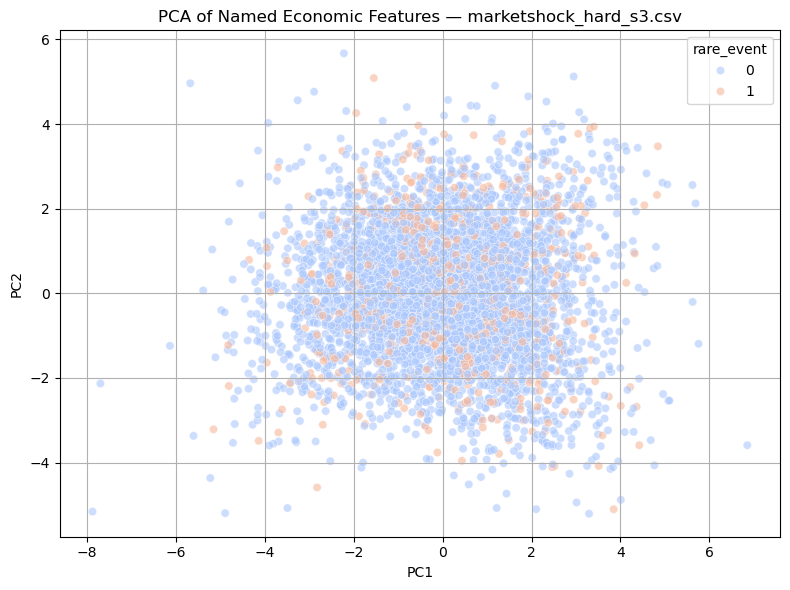


Top contributors to PC1 — marketshock_hard_s3.csv:
margin_debt                0.771382
nowcast_gdp                0.756480
output_gap                 0.730283
ECB_RATE                   0.586536
Phillips_curve_distance    0.478895
Name: PC1, dtype: float64

Top contributors to PC2 — marketshock_hard_s3.csv:
inflation_rate            0.847710
real_interest_rate_gap    0.678073
retail_sales              0.484741
oil_price                 0.465002
housing_starts            0.413314
Name: PC2, dtype: float64


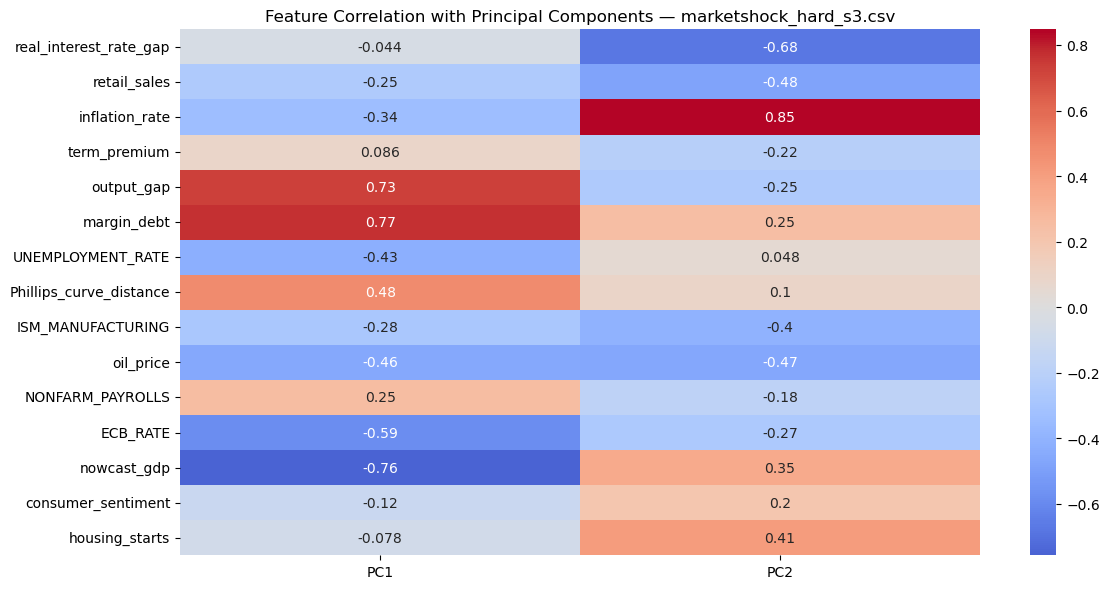


Feature Label Mapping (Unblinding Simulation):
feature_0 -> real_interest_rate_gap
feature_1 -> retail_sales
feature_2 -> inflation_rate
feature_3 -> term_premium
feature_4 -> output_gap
feature_5 -> margin_debt
feature_6 -> UNEMPLOYMENT_RATE
feature_7 -> Phillips_curve_distance
feature_8 -> ISM_MANUFACTURING
feature_9 -> oil_price
feature_10 -> NONFARM_PAYROLLS
feature_11 -> ECB_RATE
feature_12 -> nowcast_gdp
feature_13 -> consumer_sentiment
feature_14 -> housing_starts

Processing: marketshock_medium_s1.csv — Shape: (5000, 16)


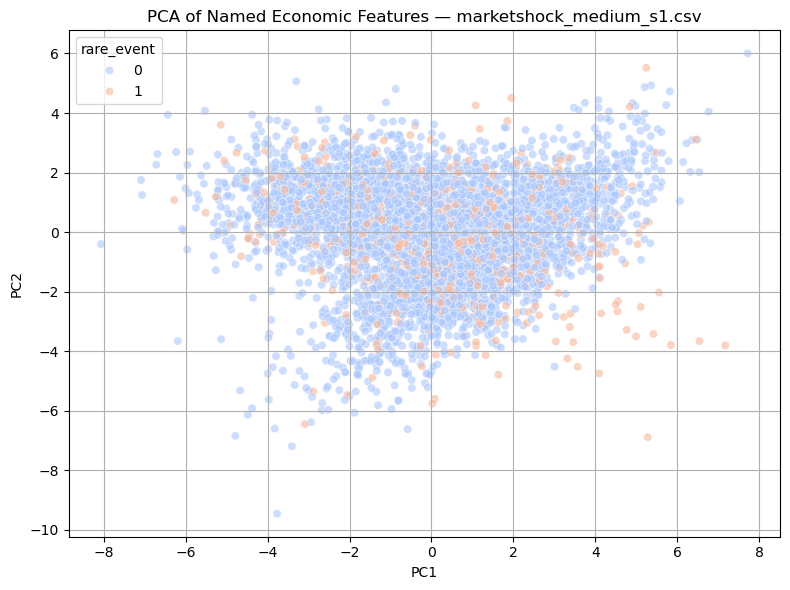


Top contributors to PC1 — marketshock_medium_s1.csv:
inflation_rate            0.946201
consumer_sentiment        0.921528
ECB_RATE                  0.894800
margin_debt               0.735312
real_interest_rate_gap    0.649605
Name: PC1, dtype: float64

Top contributors to PC2 — marketshock_medium_s1.csv:
retail_sales               0.855845
UNEMPLOYMENT_RATE          0.709924
Phillips_curve_distance    0.620467
term_premium               0.611845
NONFARM_PAYROLLS           0.550969
Name: PC2, dtype: float64


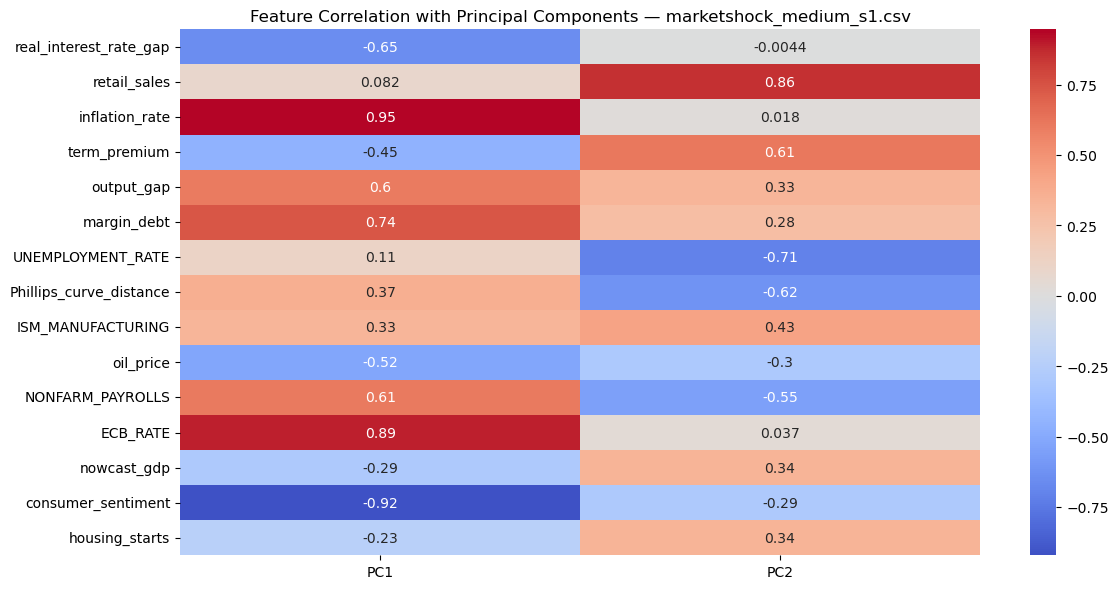


Feature Label Mapping (Unblinding Simulation):
feature_0 -> real_interest_rate_gap
feature_1 -> retail_sales
feature_2 -> inflation_rate
feature_3 -> term_premium
feature_4 -> output_gap
feature_5 -> margin_debt
feature_6 -> UNEMPLOYMENT_RATE
feature_7 -> Phillips_curve_distance
feature_8 -> ISM_MANUFACTURING
feature_9 -> oil_price
feature_10 -> NONFARM_PAYROLLS
feature_11 -> ECB_RATE
feature_12 -> nowcast_gdp
feature_13 -> consumer_sentiment
feature_14 -> housing_starts

Processing: marketshock_medium_s2.csv — Shape: (5000, 16)


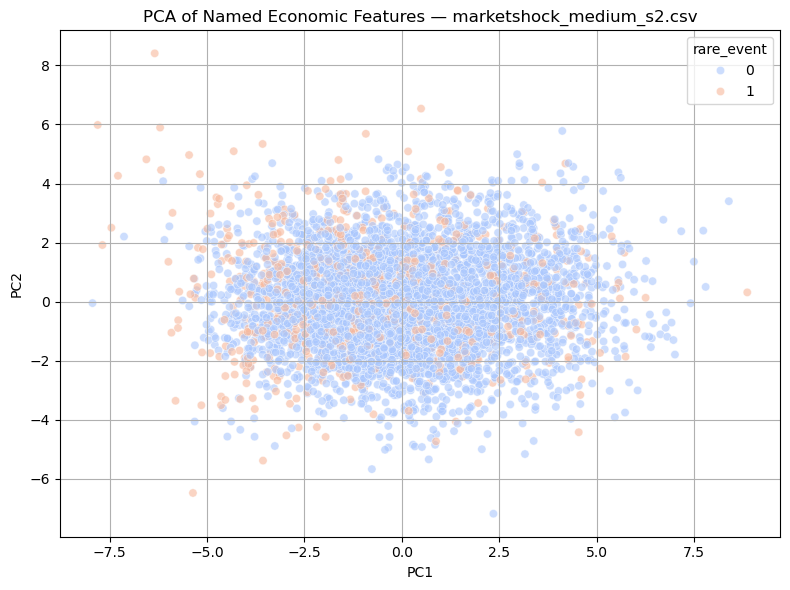


Top contributors to PC1 — marketshock_medium_s2.csv:
margin_debt       0.930171
output_gap        0.839835
inflation_rate    0.782225
ECB_RATE          0.737336
housing_starts    0.716136
Name: PC1, dtype: float64

Top contributors to PC2 — marketshock_medium_s2.csv:
term_premium               0.776148
ISM_MANUFACTURING          0.759068
Phillips_curve_distance    0.689507
oil_price                  0.601039
consumer_sentiment         0.452245
Name: PC2, dtype: float64


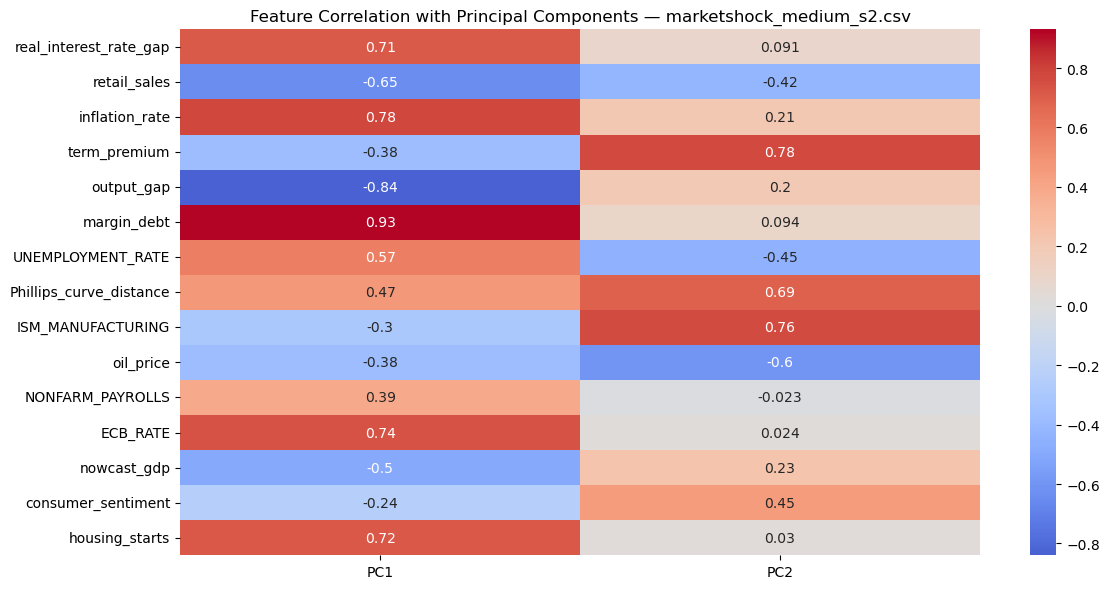


Feature Label Mapping (Unblinding Simulation):
feature_0 -> real_interest_rate_gap
feature_1 -> retail_sales
feature_2 -> inflation_rate
feature_3 -> term_premium
feature_4 -> output_gap
feature_5 -> margin_debt
feature_6 -> UNEMPLOYMENT_RATE
feature_7 -> Phillips_curve_distance
feature_8 -> ISM_MANUFACTURING
feature_9 -> oil_price
feature_10 -> NONFARM_PAYROLLS
feature_11 -> ECB_RATE
feature_12 -> nowcast_gdp
feature_13 -> consumer_sentiment
feature_14 -> housing_starts

Processing: marketshock_medium_s3.csv — Shape: (5000, 16)


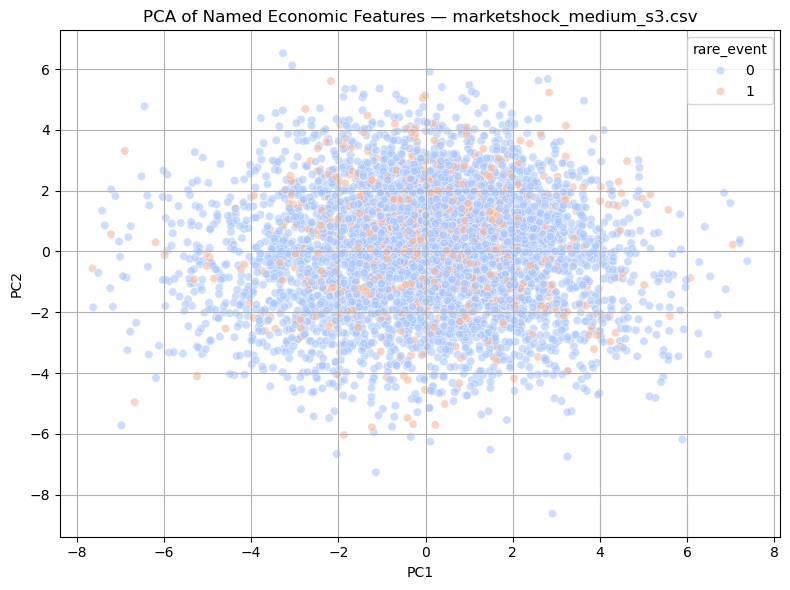


Top contributors to PC1 — marketshock_medium_s3.csv:
ECB_RATE                   0.978537
real_interest_rate_gap     0.933157
retail_sales               0.910653
term_premium               0.786986
Phillips_curve_distance    0.759973
Name: PC1, dtype: float64

Top contributors to PC2 — marketshock_medium_s3.csv:
margin_debt       0.951321
oil_price         0.932757
inflation_rate    0.843169
output_gap        0.683790
housing_starts    0.600119
Name: PC2, dtype: float64


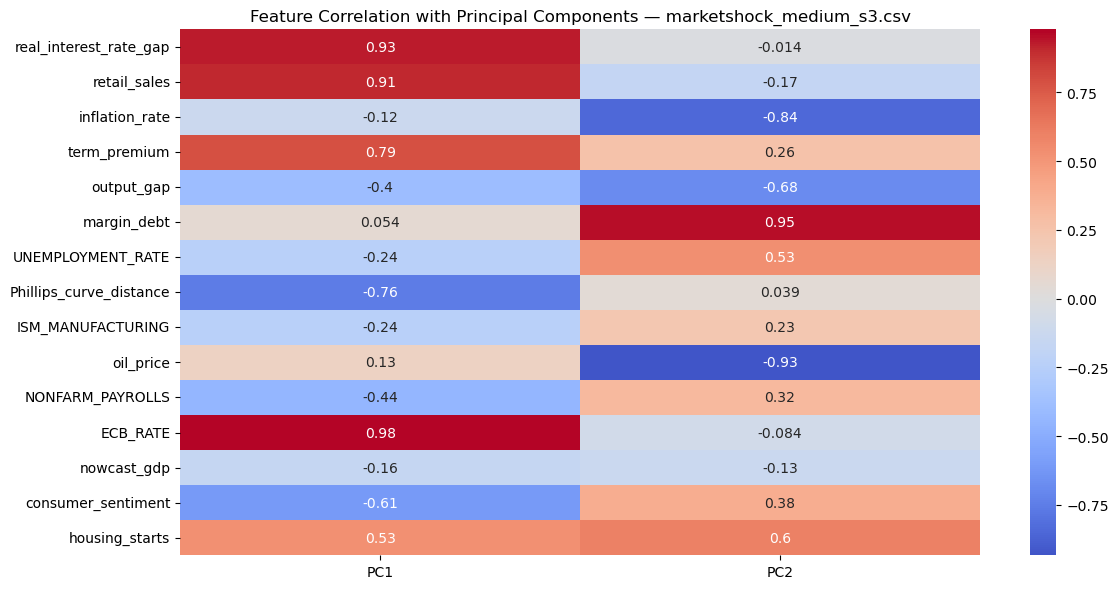


Feature Label Mapping (Unblinding Simulation):
feature_0 -> real_interest_rate_gap
feature_1 -> retail_sales
feature_2 -> inflation_rate
feature_3 -> term_premium
feature_4 -> output_gap
feature_5 -> margin_debt
feature_6 -> UNEMPLOYMENT_RATE
feature_7 -> Phillips_curve_distance
feature_8 -> ISM_MANUFACTURING
feature_9 -> oil_price
feature_10 -> NONFARM_PAYROLLS
feature_11 -> ECB_RATE
feature_12 -> nowcast_gdp
feature_13 -> consumer_sentiment
feature_14 -> housing_starts


In [17]:
# 📓 Notebook: Rare Event Unblinding & PCA Economic Interpretation

import os
import glob
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configurable Concept Pools ---
ECONOMIC_CONCEPT_POOLS = {
    "layman_friendly": [
        "oil_price", "housing_starts", "inflation_rate", "consumer_sentiment", "VIX_index",
        "gas_prices", "rent_prices", "retail_sales", "stock_index_level", "job_postings"
    ],
    "professional_signal": [
        "credit_spread", "yield_curve_slope", "foreign_exchange_rate", "market_liquidity",
        "corporate_earnings_forecast", "PMI", "volatility_risk_premium", "debt_issuance",
        "margin_debt", "ETF_flows"
    ],
    "academic_theory": [
        "output_gap", "term_premium", "monetary_velocity", "natural_rate_of_unemployment",
        "total_factor_productivity", "sticky_prices_index", "savings_rate_theory",
        "debt_to_gdp_ratio", "Phillips_curve_distance"
    ],
    "engineered_or_model_outputs": [
        "nowcast_gdp", "recession_model_score", "economic_surprise_index",
        "real_interest_rate_gap", "model_derived_expectations", "latent_growth_factor"
    ],
    "linchpins": [
        "FED_FUNDS_RATE", "GDP", "UNEMPLOYMENT_RATE", "INFLATION_EXPECTATIONS",
        "NONFARM_PAYROLLS", "CPI_CORE", "ISM_MANUFACTURING", "ECB_RATE"
    ]
}

# Flatten & shuffle all concepts
all_concepts = sum(ECONOMIC_CONCEPT_POOLS.values(), [])
random.shuffle(all_concepts)

# Set your dataset folder
DATA_FOLDER = "market_shock_synthetic_datasets"
csv_paths = sorted(glob.glob(os.path.join(DATA_FOLDER, "marketshock_*.csv")))

for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    dataset_name = os.path.basename(csv_path)

    print(f"\nProcessing: {dataset_name} — Shape: {df.shape}")

    raw_features = [col for col in df.columns if col != "rare_event"]
    X = df[raw_features]
    y = df["rare_event"]

    if len(raw_features) > len(all_concepts):
        raise ValueError("Not enough concept labels for features. Expand the pool.")

    feature_map = dict(zip(raw_features, all_concepts[:len(raw_features)]))
    X_named = X.rename(columns=feature_map)

    # Standardize & PCA
    X_scaled = StandardScaler().fit_transform(X_named)
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)

    # Scatterplot with rare events overlay
    pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
    pca_df["rare_event"] = y
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="rare_event", palette="coolwarm", alpha=0.6)
    plt.title(f"PCA of Named Economic Features — {dataset_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Correlation back to raw features
    proj_df = pd.DataFrame(X_scaled, columns=X_named.columns)
    proj_df["PC1"] = components[:, 0]
    proj_df["PC2"] = components[:, 1]
    correlations = proj_df.corr().loc[X_named.columns, ["PC1", "PC2"]]

    for pc in ["PC1", "PC2"]:
        top = correlations[pc].abs().sort_values(ascending=False).head(5)
        print(f"\nTop contributors to {pc} — {dataset_name}:")
        print(top)

    # Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)
    plt.title(f"Feature Correlation with Principal Components — {dataset_name}")
    plt.tight_layout()
    plt.show()

    # Print label mapping
    print("\nFeature Label Mapping (Unblinding Simulation):")
    for k, v in feature_map.items():
        print(f"{k} -> {v}")